**Key improvements in the modern version:**

- ✅ **Python 3** - fixed print syntax
- ✅ **Modern parameters** - max_iter instead of n_iter for SGD
- ✅ **Data standardization** - critical for SGD and Ridge
- ✅ **train_test_split** - modern way to split data
- ✅ **Overfitting analysis** - testing different alpha for Ridge
- ✅ **Visualization** - graphs for understanding model performance
- ✅ **Model comparison** - a unified results table

**Key concepts:**
1. **Multidimensional regression** - multiple features → one output
2. **Ridge regression** - prevents overfitting
3. **Polynomial features** - modeling nonlinear dependencies
4. **SGD** - efficient algorithm for large data


In [1]:
# =============================================================================
# CELL 1: Import libraries for multiple regression
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

print("✅ All libraries for multiple regression have been imported!")


✅ All libraries for multiple regression have been imported!


In [2]:
# =============================================================================
# CELL 2: Loading and Exploring Multivariate Data
# =============================================================================
print("📊 Loading multivariate data...")

# Loading data from file
X = []
y = []

with open('data_multivar.txt', 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.strip().split(',')]
        features = data[:-1]  # All columns except the last one are features
        target = data[-1]  # The last column is the target variable
        X.append(features)
        y.append(target)

# Converting to numpy arrays
X = np.array(X)
y = np.array(y)

print(f"📈 Data loaded:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Creating DataFrame for analysis
feature_names = [f'Feature_{i + 1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

print(f"\n📋 First 10 rows of data:")
print(df.head(10))

print(f"\n📊 Statistics for features:")
print(df.describe())


📊 Loading multivariate data...
📈 Data loaded:
Number of samples: 500
Number of features: 3
Shape of X: (500, 3)
Shape of y: (500,)

📋 First 10 rows of data:
   Feature_1  Feature_2  Feature_3  Target
0       0.39       2.78       7.11   -8.07
1       1.65       6.70       2.42   12.24
2       5.67       6.38       3.79   23.96
3       2.31       6.27       4.80    4.29
4       3.67       6.67       2.38   16.37
5       3.64       3.14       2.38   12.44
6       7.00       3.85       8.39   13.45
7       8.90       1.44       3.99   24.24
8       4.11       6.75       4.87   11.23
9       5.44       4.57       3.15   25.81

📊 Statistics for features:
        Feature_1   Feature_2   Feature_3      Target
count  500.000000  500.000000  500.000000  500.000000
mean     3.855100    4.086180    4.057680   10.636220
std      2.570655    2.613151    2.542949   12.238141
min     -3.850000   -1.710000   -3.300000  -28.910000
25%      2.107500    2.265000    2.397500    1.225000
50%      3.925000 

In [3]:
# =============================================================================
# CELL 3: Data Preparation and Train/Test Split
# =============================================================================
print("🔀 Preparing and splitting data...")

# Method 1: As in the original example (80/20 without shuffling)
num_training = int(0.8 * len(X))
X_train_orig = X[:num_training]
X_test_orig = X[num_training:]
y_train_orig = y[:num_training]
y_test_orig = y[num_training:]

print("📋 Data split (original method):")
print(f"Training: {X_train_orig.shape[0]} samples")
print(f"Test: {X_test_orig.shape[0]} samples")

# Method 2: Modern approach with shuffling
X_train_modern, X_test_modern, y_train_modern, y_test_modern = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n📋 Data split (modern method):")
print(f"Training: {X_train_modern.shape[0]} samples")
print(f"Test: {X_test_modern.shape[0]} samples")

# We will use the modern approach
X_train, X_test = X_train_modern, X_test_modern
y_train, y_test = y_train_modern, y_test_modern

# Data standardization (important for SGD and Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n📊 Standardization completed!")
print(f"Mean X_train before standardization: {X_train.mean(axis=0)}")
print(f"Mean X_train after standardization: {X_train_scaled.mean(axis=0)}")


🔀 Preparing and splitting data...
📋 Data split (original method):
Training: 400 samples
Test: 100 samples

📋 Data split (modern method):
Training: 400 samples
Test: 100 samples

📊 Standardization completed!
Mean X_train before standardization: [3.7852   4.146875 4.0006  ]
Mean X_train after standardization: [-7.21644966e-16 -1.54291510e-15  5.53168622e-16]


In [4]:
# =============================================================================
# CELL 4: Creating and training various models
# =============================================================================
print("🤖 Creating and training models...")

# 1. Ordinary linear regression
print("\n1️⃣ Ordinary linear regression:")
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
print("✅ Trained!")

# 2. Ridge regression (L2 regularization)
print("\n2️⃣ Ridge regression:")
ridge_regressor = Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
ridge_regressor.fit(X_train, y_train)
print("✅ Trained!")

# 3. SGD regressor (modern version)
print("\n3️⃣ SGD regressor:")
sgd_regressor = SGDRegressor(
    loss='huber',  # 'huber' instead of deprecated parameters
    max_iter=1000,  # 'max_iter' instead of 'n_iter'
    random_state=42,
    alpha=0.01
)
sgd_regressor.fit(X_train_scaled, y_train)  # Using standardized data
print("✅ Trained!")

# 4. Polynomial regression
print("\n4️⃣ Polynomial regression:")
polynomial = PolynomialFeatures(degree=2, include_bias=False)  # Reduced degree
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.transform(X_test)

poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)
print("✅ Trained!")

print(f"\n📊 Model information:")
print(f"Original features: {X_train.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")


🤖 Creating and training models...

1️⃣ Ordinary linear regression:
✅ Trained!

2️⃣ Ridge regression:
✅ Trained!

3️⃣ SGD regressor:
✅ Trained!

4️⃣ Polynomial regression:
✅ Trained!

📊 Model information:
Original features: 3
Polynomial features: 9


In [5]:
# =============================================================================
# CELL 5: Predictions of all models
# =============================================================================
print("🔮 Making predictions...")

# Predictions on test data
y_pred_linear = linear_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_sgd = sgd_regressor.predict(X_test_scaled)
y_pred_poly = poly_regressor.predict(X_test_poly)

print("✅ Predictions completed!")

# Predictions for a specific data point
test_datapoint = np.array([[0.39, 2.78, 7.11]])  # Example from the original code
test_datapoint_scaled = scaler.transform(test_datapoint)
test_datapoint_poly = polynomial.transform(test_datapoint)

print(f"\n🎯 Predictions for point {test_datapoint[0]}:")
print(f"Linear regression:     {linear_regressor.predict(test_datapoint)[0]:.3f}")
print(f"Ridge regression:      {ridge_regressor.predict(test_datapoint)[0]:.3f}")
print(f"SGD regressor:        {sgd_regressor.predict(test_datapoint_scaled)[0]:.3f}")
print(f"Polynomial regression: {poly_regressor.predict(test_datapoint_poly)[0]:.3f}")


🔮 Making predictions...
✅ Predictions completed!

🎯 Predictions for point [0.39 2.78 7.11]:
Linear regression:     -10.521
Ridge regression:      -10.521
SGD regressor:        -1.643
Polynomial regression: -10.914


In [6]:
# =============================================================================
# CELL 6: Model Quality Assessment
# =============================================================================
print("📈 Model Quality Assessment:")
print("=" * 80)

models = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'SGD Regressor': y_pred_sgd,
    'Polynomial Regression': y_pred_poly
}

results = []

for name, predictions in models.items():
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    })

    print(f"\n{name}:")
    print(f"  MAE: {mae:.4f}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R²:  {r2:.4f}")

# Create results table
results_df = pd.DataFrame(results)
print(f"\n📊 Summary Results Table:")
print(results_df.round(4))

# Find the best model
best_model_idx = results_df['R²'].idxmax()
best_model = results_df.loc[best_model_idx, 'Model']
best_r2 = results_df.loc[best_model_idx, 'R²']

print(f"\n🏆 Best Model: {best_model} (R² = {best_r2:.4f})")


📈 Model Quality Assessment:

Linear Regression:
  MAE: 3.3856
  MSE: 19.0252
  R²:  0.8745

Ridge Regression:
  MAE: 3.3856
  MSE: 19.0251
  R²:  0.8745

SGD Regressor:
  MAE: 10.1891
  MSE: 139.1178
  R²:  0.0826

Polynomial Regression:
  MAE: 3.4193
  MSE: 19.4398
  R²:  0.8718

📊 Summary Results Table:
                   Model      MAE       MSE      R²
0      Linear Regression   3.3856   19.0252  0.8745
1       Ridge Regression   3.3856   19.0251  0.8745
2          SGD Regressor  10.1891  139.1178  0.0826
3  Polynomial Regression   3.4193   19.4398  0.8718

🏆 Best Model: Ridge Regression (R² = 0.8745)


📊 Creating visualizations...


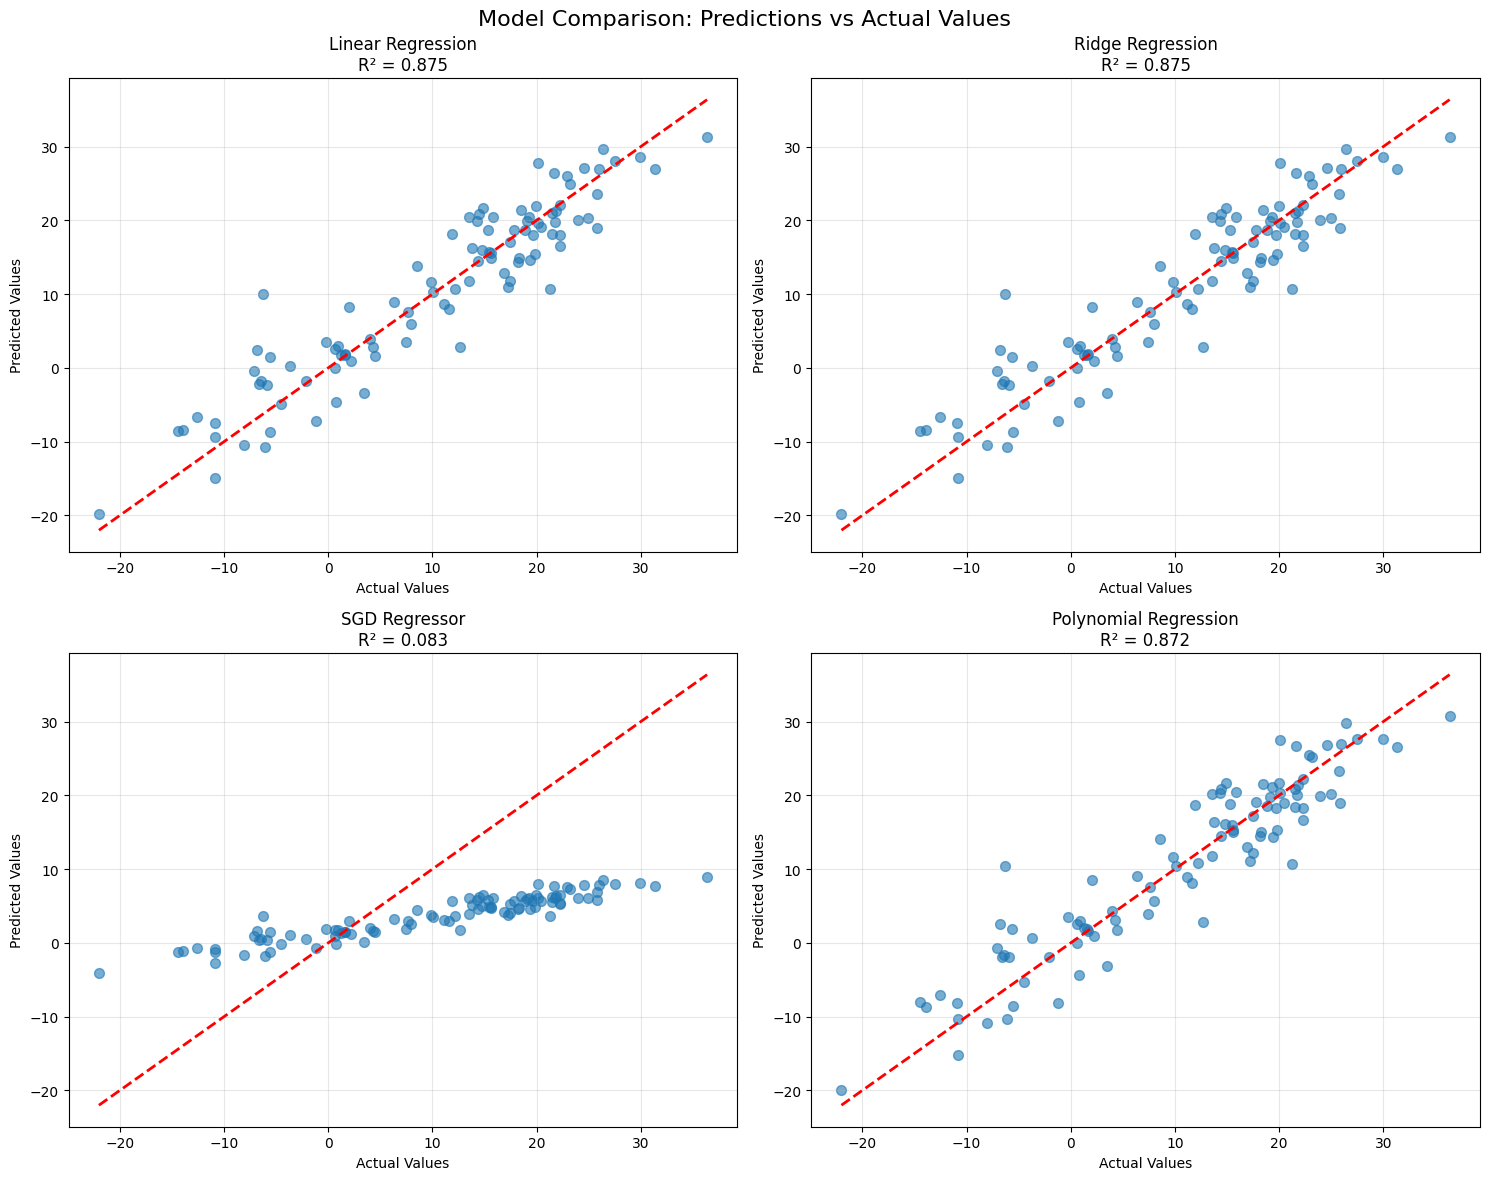

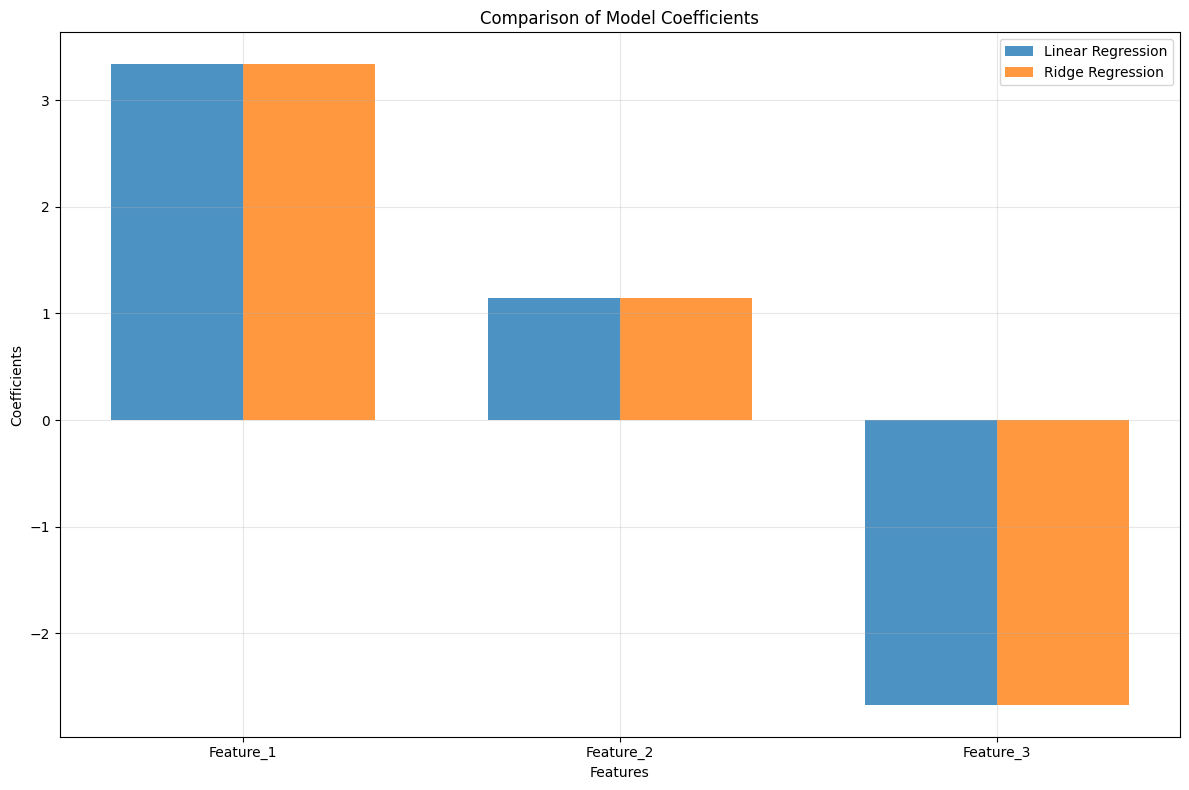

✅ Visualization completed!


In [7]:
# =============================================================================
# CELL 7: Visualization of Results
# =============================================================================
print("📊 Creating visualizations...")

# Plot 1: Comparison of Predictions with Actual Values
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Comparison: Predictions vs Actual Values', fontsize=16)

models_for_plot = [
    ('Linear Regression', y_pred_linear),
    ('Ridge Regression', y_pred_ridge),
    ('SGD Regressor', y_pred_sgd),
    ('Polynomial Regression', y_pred_poly)
]

for idx, (name, predictions) in enumerate(models_for_plot):
    ax = axes[idx // 2, idx % 2]

    # Scatter plot
    ax.scatter(y_test, predictions, alpha=0.6, s=50)

    # Ideal line (y = x)
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

    # Formatting
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{name}\nR² = {r2_score(y_test, predictions):.3f}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Plot 2: Feature Importance (Coefficients)
plt.figure(figsize=(12, 8))

# Coefficients for Linear Regression
linear_coef = linear_regressor.coef_
ridge_coef = ridge_regressor.coef_

x_pos = np.arange(len(feature_names))
width = 0.35

plt.bar(x_pos - width / 2, linear_coef, width, label='Linear Regression', alpha=0.8)
plt.bar(x_pos + width / 2, ridge_coef, width, label='Ridge Regression', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Comparison of Model Coefficients')
plt.xticks(x_pos, feature_names)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Visualization completed!")


🔍 Analyzing the impact of regularization...
Alpha =  0.001: Train R² = 0.8614, Test R² = 0.8745
Alpha =  0.010: Train R² = 0.8614, Test R² = 0.8745
Alpha =  0.100: Train R² = 0.8614, Test R² = 0.8745
Alpha =  1.000: Train R² = 0.8614, Test R² = 0.8745
Alpha = 10.000: Train R² = 0.8614, Test R² = 0.8746
Alpha = 100.000: Train R² = 0.8602, Test R² = 0.8740


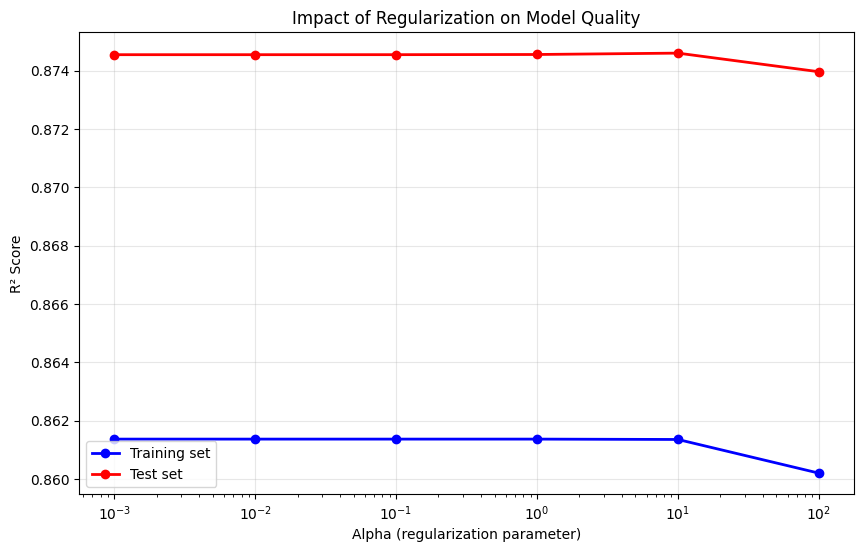


🎯 Optimal alpha: 10.0 (Test R² = 0.8746)


In [8]:
# =============================================================================
# CELL 8: Overfitting and Regularization Analysis
# =============================================================================
print("🔍 Analyzing the impact of regularization...")

# Testing different alpha values for Ridge
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    train_pred = ridge.predict(X_train)
    test_pred = ridge.predict(X_test)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

    print(f"Alpha = {alpha:6.3f}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

# Plot dependence on alpha
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores, 'b-o', label='Training set', linewidth=2)
plt.semilogx(alphas, test_scores, 'r-o', label='Test set', linewidth=2)
plt.xlabel('Alpha (regularization parameter)')
plt.ylabel('R² Score')
plt.title('Impact of Regularization on Model Quality')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal alpha
optimal_idx = np.argmax(test_scores)
optimal_alpha = alphas[optimal_idx]
print(f"\n🎯 Optimal alpha: {optimal_alpha} (Test R² = {test_scores[optimal_idx]:.4f})")


In [9]:
# =============================================================================
# CELL 9: Practical Recommendations
# =============================================================================
print("💡 Practical Recommendations:")
print("=" * 50)

print("1️⃣ Model Selection:")
if results_df.loc[results_df['Model'] == 'Polynomial Regression', 'R²'].values[0] > 0.8:
    print("   ✅ Polynomial regression shows excellent results")
    print("   ⚠️  But be careful with overfitting!")
elif results_df.loc[results_df['Model'] == 'Ridge Regression', 'R²'].values[0] > 0.7:
    print("   ✅ Ridge regression is a good balance between quality and stability")
else:
    print("   ✅ Simple linear regression is suitable for this data")

print(f"\n2️⃣ Importance of Standardization:")
print(f"   • SGD requires data standardization")
print(f"   • Ridge works better with standardized data")
print(f"   • Ordinary linear regression is robust to scale")

print(f"\n3️⃣ Modern Improvements Compared to the Original Code:")
print(f"   ✅ Use of train_test_split with shuffling")
print(f"   ✅ Data standardization")
print(f"   ✅ Correct parameters for SGD (max_iter instead of n_iter)")
print(f"   ✅ Overfitting analysis")
print(f"   ✅ Result visualization")

print(f"\n4️⃣ Next Steps:")
print(f"   📈 Try cross-validation for a more accurate assessment")
print(f"   🔍 Explore feature importance")
print(f"   ⚡ Consider other algorithms (Random Forest, Gradient Boosting)")

# Create the final model with optimal parameters
final_model = Ridge(alpha=optimal_alpha)
final_model.fit(X_train, y_train)

print(f"\n🎯 Final Recommended Model:")
print(f"   Ridge regression with alpha = {optimal_alpha}")
print(f"   R² on the test set: {r2_score(y_test, final_model.predict(X_test)):.4f}")


💡 Practical Recommendations:
1️⃣ Model Selection:
   ✅ Polynomial regression shows excellent results
   ⚠️  But be careful with overfitting!

2️⃣ Importance of Standardization:
   • SGD requires data standardization
   • Ridge works better with standardized data
   • Ordinary linear regression is robust to scale

3️⃣ Modern Improvements Compared to the Original Code:
   ✅ Use of train_test_split with shuffling
   ✅ Data standardization
   ✅ Correct parameters for SGD (max_iter instead of n_iter)
   ✅ Overfitting analysis
   ✅ Result visualization

4️⃣ Next Steps:
   📈 Try cross-validation for a more accurate assessment
   🔍 Explore feature importance
   ⚡ Consider other algorithms (Random Forest, Gradient Boosting)

🎯 Final Recommended Model:
   Ridge regression with alpha = 10.0
   R² on the test set: 0.8746
